# Clustering with K-Means/K-Medoids (PAM) using Swiss BFS Gemeinde Kennzahlen

---

Source:
+ xxx


---
Author:
*   dr.daniel benninger  
---
History:
*   v1, May  2024, dbe --- initial version for BINA FS24

---


# A) Setup/Installations
Install **scikit-learn-extra** a Python module for machine learning that extends scikit-learn. It includes algorithms that are useful but do not satisfy the scikit-learn inclusion criteria, for instance due to their novelty or lower citation number. E.g. *clustering with KMedoids* and *Common-nearest-neighbors*

In [1]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.7 MB/s eta 0:00:00


Load necessary libraries

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


# from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# B) Data (Up)Load



About The Sample Dataset
xxxx


In [3]:
# Loading BFS Gemeinde Kennzhalen  from Github Repository into dataframe variable
filePATH = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/zDiversExamples/DATA/BFS/"
fileNAME = "BFS_CH-Gemeinden-Kennzahlen-NEW-2021.csv"

df = pd.read_csv(filePATH+fileNAME, sep=';').copy()

df.head(5)


,GemeindeNr,GemeindeName,Einwohner-2019,Einwohner-Veränderung-2010-2019,Bevölkerungsdichte-2019,Anteil-Ausländer-2019,Anteil-Einwohner-0bis19Jahre-2019,Anteil-Einwohner-20bis64Jahre-2019,Anteil-Einwohner-65JahreUndmehr-2019,Rohe-Heiratssziffer-2019,...,Beschäftigte-1Sektor-2018,Beschäftigte-2Sektor-2018,Beschäftigte-3Sektor-2018,Arbeitsstätten-Total-2018,Arbeitsstätten-1Sektor-2018,Arbeitsstätten-2Sektor-2018,Arbeitsstätten-3Sektor-2018,Leerwohnungsziffer-2020,NeugebauteWohnungen-pro1000Einw-2018,Sozialhilfequote-2019
0,1,Aeugst am Albis,1981,8.6,250,14.2,19.8,62.2,18.0,7.1,...,39.0,25.0,378.0,141.0,15.0,16.0,110.0,5.29,13.9,1.0
1,2,Affoltern am Albis,12303,10.9,1162,28.7,20.2,61.7,18.2,5.5,...,47.0,1307.0,5566.0,995.0,23.0,134.0,838.0,1.01,3.8,3.0
2,3,Bonstetten,5572,8.0,750,16.6,23.6,59.8,16.5,4.3,...,34.0,111.0,869.0,281.0,14.0,26.0,241.0,1.17,0.2,1.5
3,4,Hausen am Albis,3751,11.6,276,16.0,22.2,59.8,18.0,3.2,...,93.0,136.0,792.0,271.0,36.0,38.0,197.0,0.63,3.0,1.2
4,5,Hedingen,3778,10.8,579,16.4,21.6,61.6,16.7,3.7,...,29.0,679.0,770.0,201.0,11.0,26.0,164.0,0.96,3.2,1.5


### Check Data - Structure and Content

In [4]:
# Dataframe structure verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   GemeindeNr                                     2172 non-null   int64  
 1   GemeindeName                                   2172 non-null   object 
 2   Einwohner-2019                                 2172 non-null   int64  
 3   Einwohner-Veränderung-2010-2019                2172 non-null   float64
 4   Bevölkerungsdichte-2019                        2172 non-null   int64  
 5   Anteil-Ausländer-2019                          2172 non-null   float64
 6   Anteil-Einwohner-0bis19Jahre-2019              2172 non-null   float64
 7   Anteil-Einwohner-20bis64Jahre-2019             2172 non-null   float64
 8   Anteil-Einwohner-65JahreUndmehr-2019           2172 non-null   float64
 9   Rohe-Heiratssziffer-2019                       2172 

In [5]:
# Making GemeindeNR  as İndex
df.index = df.iloc[:,0]
df= df.iloc[:,1:32]

In [6]:
# Show first entries
df.head()

,GemeindeName,Einwohner-2019,Einwohner-Veränderung-2010-2019,Bevölkerungsdichte-2019,Anteil-Ausländer-2019,Anteil-Einwohner-0bis19Jahre-2019,Anteil-Einwohner-20bis64Jahre-2019,Anteil-Einwohner-65JahreUndmehr-2019,Rohe-Heiratssziffer-2019,Rohe-Scheidungsziffer-2019,...,Beschäftigte-Total-2018,Beschäftigte-1Sektor-2018,Beschäftigte-2Sektor-2018,Beschäftigte-3Sektor-2018,Arbeitsstätten-Total-2018,Arbeitsstätten-1Sektor-2018,Arbeitsstätten-2Sektor-2018,Arbeitsstätten-3Sektor-2018,Leerwohnungsziffer-2020,NeugebauteWohnungen-pro1000Einw-2018
GemeindeNr,,,,,,,,,,,,,,,,,,,,,
1,Aeugst am Albis,1981,8.6,250,14.2,19.8,62.2,18.0,7.1,2.0,...,442.0,39.0,25.0,378.0,141.0,15.0,16.0,110.0,5.29,13.9
2,Affoltern am Albis,12303,10.9,1162,28.7,20.2,61.7,18.2,5.5,1.8,...,6920.0,47.0,1307.0,5566.0,995.0,23.0,134.0,838.0,1.01,3.8
3,Bonstetten,5572,8.0,750,16.6,23.6,59.8,16.5,4.3,1.8,...,1014.0,34.0,111.0,869.0,281.0,14.0,26.0,241.0,1.17,0.2
4,Hausen am Albis,3751,11.6,276,16.0,22.2,59.8,18.0,3.2,1.6,...,1021.0,93.0,136.0,792.0,271.0,36.0,38.0,197.0,0.63,3.0
5,Hedingen,3778,10.8,579,16.4,21.6,61.6,16.7,3.7,2.1,...,1478.0,29.0,679.0,770.0,201.0,11.0,26.0,164.0,0.96,3.2


In [7]:
# Check for NULL values
df.isnull().sum()

GemeindeName                                       0
Einwohner-2019                                     0
Einwohner-Veränderung-2010-2019                    0
Bevölkerungsdichte-2019                            0
Anteil-Ausländer-2019                              0
Anteil-Einwohner-0bis19Jahre-2019                  0
Anteil-Einwohner-20bis64Jahre-2019                 0
Anteil-Einwohner-65JahreUndmehr-2019               0
Rohe-Heiratssziffer-2019                           0
Rohe-Scheidungsziffer-2019                         0
Rohe-Geburtenziffer-2019                           0
Rohe-Sterbeziffer-2019                             0
Anzahl-Privathaushalte-2019                        0
Durchschnittliche-Haushaltsgrösse-inPers-2019      0
Gesamtfläche-inkm2-2016                            0
Anteil-Siedlungsfläche-2009                        0
Veränderung-inha-1979-2009                         0
Anteil-Landwirtschaftsfläche-2009                  0
Veränderung-inha-1979/1985/2004/2009.1        

In [8]:
df_columns = list(df.columns.values)
df_columns

['GemeindeName',
 'Einwohner-2019',
 'Einwohner-Veränderung-2010-2019',
 'Bevölkerungsdichte-2019',
 'Anteil-Ausländer-2019',
 'Anteil-Einwohner-0bis19Jahre-2019',
 'Anteil-Einwohner-20bis64Jahre-2019',
 'Anteil-Einwohner-65JahreUndmehr-2019',
 'Rohe-Heiratssziffer-2019',
 'Rohe-Scheidungsziffer-2019',
 'Rohe-Geburtenziffer-2019',
 'Rohe-Sterbeziffer-2019',
 'Anzahl-Privathaushalte-2019',
 'Durchschnittliche-Haushaltsgrösse-inPers-2019',
 'Gesamtfläche-inkm2-2016',
 'Anteil-Siedlungsfläche-2009',
 'Veränderung-inha-1979-2009',
 'Anteil-Landwirtschaftsfläche-2009',
 'Veränderung-inha-1979/1985/2004/2009.1',
 'Anteil-WaldUndGehölze-2009',
 'Anteil-UnproduktiveFläche-2009',
 'Beschäftigte-Total-2018',
 'Beschäftigte-1Sektor-2018',
 'Beschäftigte-2Sektor-2018',
 'Beschäftigte-3Sektor-2018',
 'Arbeitsstätten-Total-2018',
 'Arbeitsstätten-1Sektor-2018',
 'Arbeitsstätten-2Sektor-2018',
 'Arbeitsstätten-3Sektor-2018',
 'Leerwohnungsziffer-2020',
 'NeugebauteWohnungen-pro1000Einw-2018']

In [9]:
df2 = df.loc[:, ['Einwohner-Veränderung-2010-2019', 'Bevölkerungsdichte-2019', 'Anteil-Ausländer-2019', 'Anteil-Einwohner-0bis19Jahre-2019', 'Anteil-Einwohner-20bis64Jahre-2019', 'Anteil-Einwohner-65JahreUndmehr-2019']]


In [10]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2172 entries, 1 to 6810
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Einwohner-Veränderung-2010-2019       2172 non-null   float64
 1   Bevölkerungsdichte-2019               2172 non-null   int64  
 2   Anteil-Ausländer-2019                 2172 non-null   float64
 3   Anteil-Einwohner-0bis19Jahre-2019     2172 non-null   float64
 4   Anteil-Einwohner-20bis64Jahre-2019    2172 non-null   float64
 5   Anteil-Einwohner-65JahreUndmehr-2019  2172 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 118.8 KB


,Einwohner-Veränderung-2010-2019,Bevölkerungsdichte-2019,Anteil-Ausländer-2019,Anteil-Einwohner-0bis19Jahre-2019,Anteil-Einwohner-20bis64Jahre-2019,Anteil-Einwohner-65JahreUndmehr-2019
GemeindeNr,,,,,,
1,8.6,250,14.2,19.8,62.2,18.0
2,10.9,1162,28.7,20.2,61.7,18.2
3,8.0,750,16.6,23.6,59.8,16.5
4,11.6,276,16.0,22.2,59.8,18.0
5,10.8,579,16.4,21.6,61.6,16.7


# C) Initial (descriptive) Analysis

**Histogram Visualization** - Hint: use different settings for *bins*




array([[<Axes: title={'center': 'Einwohner-Veränderung-2010-2019'}>,
        <Axes: title={'center': 'Bevölkerungsdichte-2019'}>],
       [<Axes: title={'center': 'Anteil-Ausländer-2019'}>,
        <Axes: title={'center': 'Anteil-Einwohner-0bis19Jahre-2019'}>],
       [<Axes: title={'center': 'Anteil-Einwohner-20bis64Jahre-2019'}>,
        <Axes: title={'center': 'Anteil-Einwohner-65JahreUndmehr-2019'}>]],
      dtype=object)

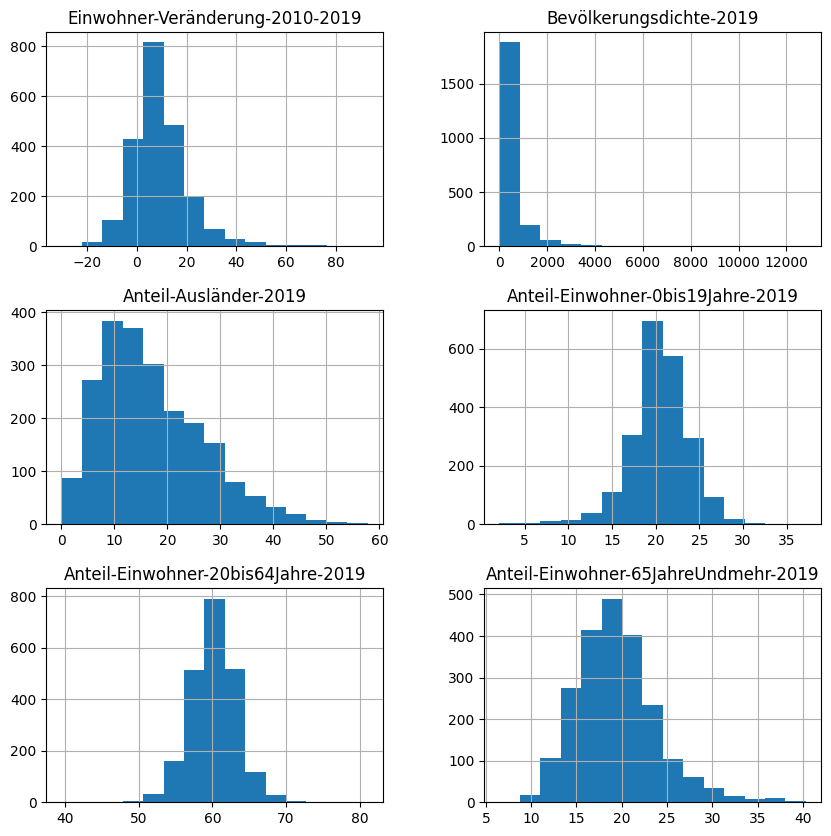

In [11]:
df2.hist(bins=15,figsize=(10,10))

Calculate the **Magic Five** statistical measure (i.e. *Tukey Measure*) for each variable and visualize them with **Boxplot** diagrams

In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Einwohner-Veränderung-2010-2019,2172.0,9.209899,11.342446,-30.3,2.40,7.95,14.400,92.8
Bevölkerungsdichte-2019,2172.0,437.707643,792.787000,1.0,80.75,185.00,467.000,12811.0
Anteil-Ausländer-2019,2172.0,16.947744,9.702113,0.0,9.60,15.20,23.125,57.8
Anteil-Einwohner-0bis19Jahre-2019,2172.0,20.471455,3.367026,2.1,18.70,20.60,22.500,37.2
Anteil-Einwohner-20bis64Jahre-2019,2172.0,60.154880,3.197797,39.5,58.30,60.25,62.200,81.1
Anteil-Einwohner-65JahreUndmehr-2019,2172.0,19.374540,4.413891,6.5,16.40,19.00,21.600,40.3


Text(0.5, 1.0, 'Boxplot: BFS Gemeinde Kennzahlen (Auszug)')

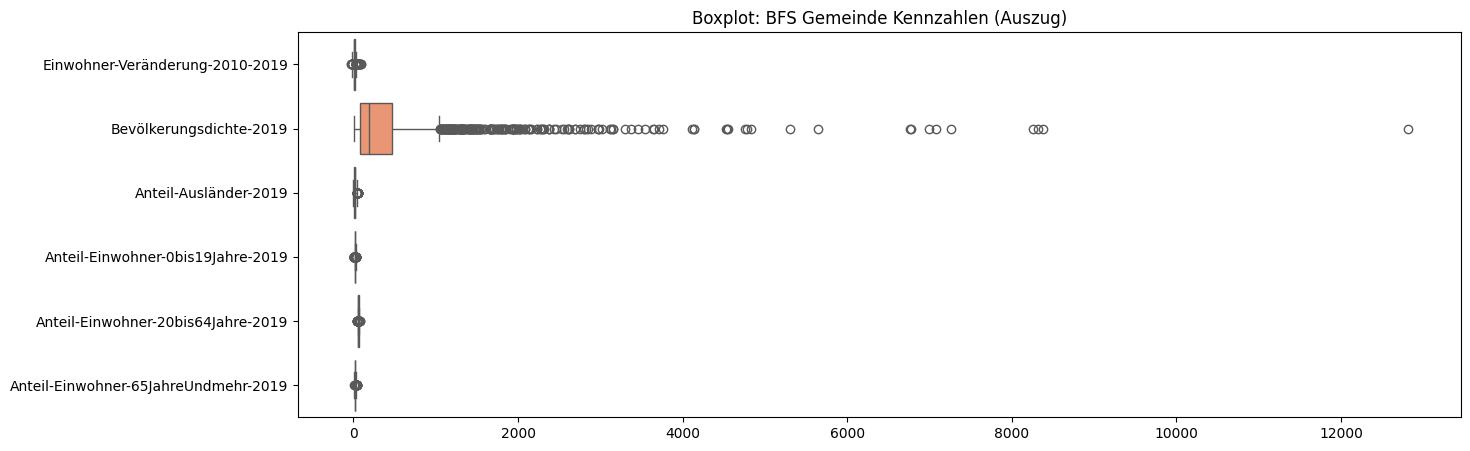

In [13]:
plt.figure(figsize=(15,5))

diag_box = sns.boxplot(data=df2, orient="h", palette="Set2")

plt.title("Boxplot: BFS Gemeinde Kennzahlen (Auszug)")

# D) Normalize all variables using z-Score Tranformation

In [14]:
from scipy.stats import zscore

df2_trans = df2.apply(zscore)

In [15]:
# Show first entries of the transformed data
df2_trans.head(5)

,Einwohner-Veränderung-2010-2019,Bevölkerungsdichte-2019,Anteil-Ausländer-2019,Anteil-Einwohner-0bis19Jahre-2019,Anteil-Einwohner-20bis64Jahre-2019,Anteil-Einwohner-65JahreUndmehr-2019
GemeindeNr,,,,,,
1,-0.053784,-0.236824,-0.283276,-0.199467,0.639688,-0.311484
2,0.149041,0.913813,1.211588,-0.080640,0.483294,-0.266162
3,-0.106695,0.394008,-0.035850,0.929386,-0.111002,-0.651398
4,0.210770,-0.204021,-0.097707,0.513493,-0.111002,-0.311484
5,0.140223,0.178263,-0.056469,0.335253,0.452015,-0.606076


Text(0.5, 1.0, 'Boxplot: BFS Gemeinde Kennzahlen (Auszug) (z-Transform)')

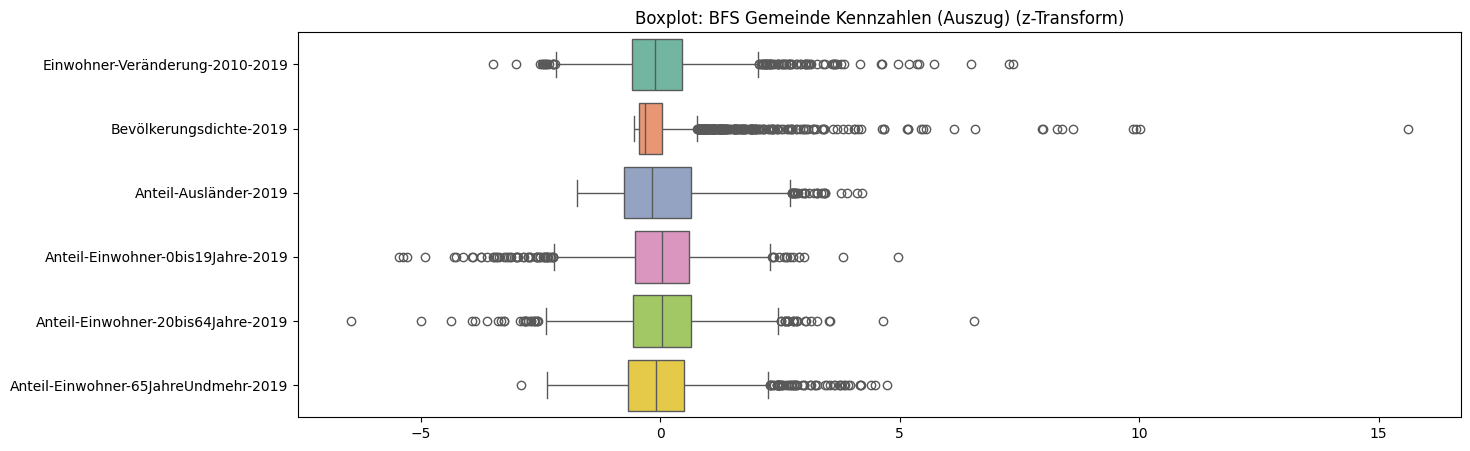

In [16]:
plt.figure(figsize=(15,5))
diag_box2 = sns.boxplot(data=df2_trans, orient="h", palette="Set2")

plt.title("Boxplot: BFS Gemeinde Kennzahlen (Auszug) (z-Transform)")

---  
# E) **Clustering** with **k-Medoid** Algorithm  
---

Using **Partitioning Around Medoid** (PAM) as a variant of the clustering algorithm using *existing observations* as *centroids of clusters*

### Configuration of the PAM clustering algorithm

In [17]:
# Key Parameters: "metric" = distance function / n_clusters = Number of Clusters to detect
kmedoid = KMedoids(metric="euclidean", n_clusters=26, init="heuristic", max_iter=200)

print(kmedoid)

KMedoids(max_iter=200, n_clusters=26)


In [18]:
# Apply configured clustering algorithm to BFS Gemeinde Kennzahlen dataframe
pam_fit= kmedoid.fit(df2_trans)

# Show detected number of clusters
pam_fit.n_clusters

26

In [19]:
# Show applied distance function
pam_fit.metric

'euclidean'

In [20]:
# Show calculated PAM centroids
pam_fit.cluster_centers_

array([[-4.06522584e-01, -4.08410061e-01, -2.93585507e-01,
        -9.42132707e-01,  1.42165580e+00, -3.11483939e-01],
       [ 8.80974191e-01, -2.12852246e-01, -4.17298385e-01,
        -5.09334853e-02,  1.39227799e-01, -6.22133219e-02],
       [ 2.20374485e+00,  2.21159938e-01,  7.99211583e-01,
         9.59092300e-01,  7.02244971e-01, -1.21792255e+00],
       [-2.03697749e-01, -2.27992205e-01, -6.33795922e-01,
         8.40265737e-01,  1.07949067e-01, -7.19381312e-01],
       [ 2.54862746e-01,  3.05691381e-01,  4.28072949e-01,
        -2.12268446e-02, -1.71658602e-02,  2.84305387e-02],
       [-1.23545886e+00, -4.26073347e-01, -5.71939483e-01,
        -1.26890576e+00, -1.26831513e+00,  1.88662968e+00],
       [-8.72914953e-04, -1.59862386e-01, -1.80182035e-01,
        -1.40053408e-01,  4.20736385e-01, -1.98179113e-01],
       [-3.35974815e-01,  3.60872597e+00,  1.24251606e+00,
        -1.40053408e-01,  2.64342726e-01, -8.48742871e-02],
       [ 1.18080221e+00, -4.88360132e-02, -2.214

In [21]:
pam_fit.labels_

array([ 6,  9, 10, ...,  5,  5, 21])

In [22]:
# Extract cluster labels
clusters = pam_fit.labels_

Text(0.5, 1.0, 'PAM Clustering with k-Medoids - BFS Gemeinde Kennzahlen')

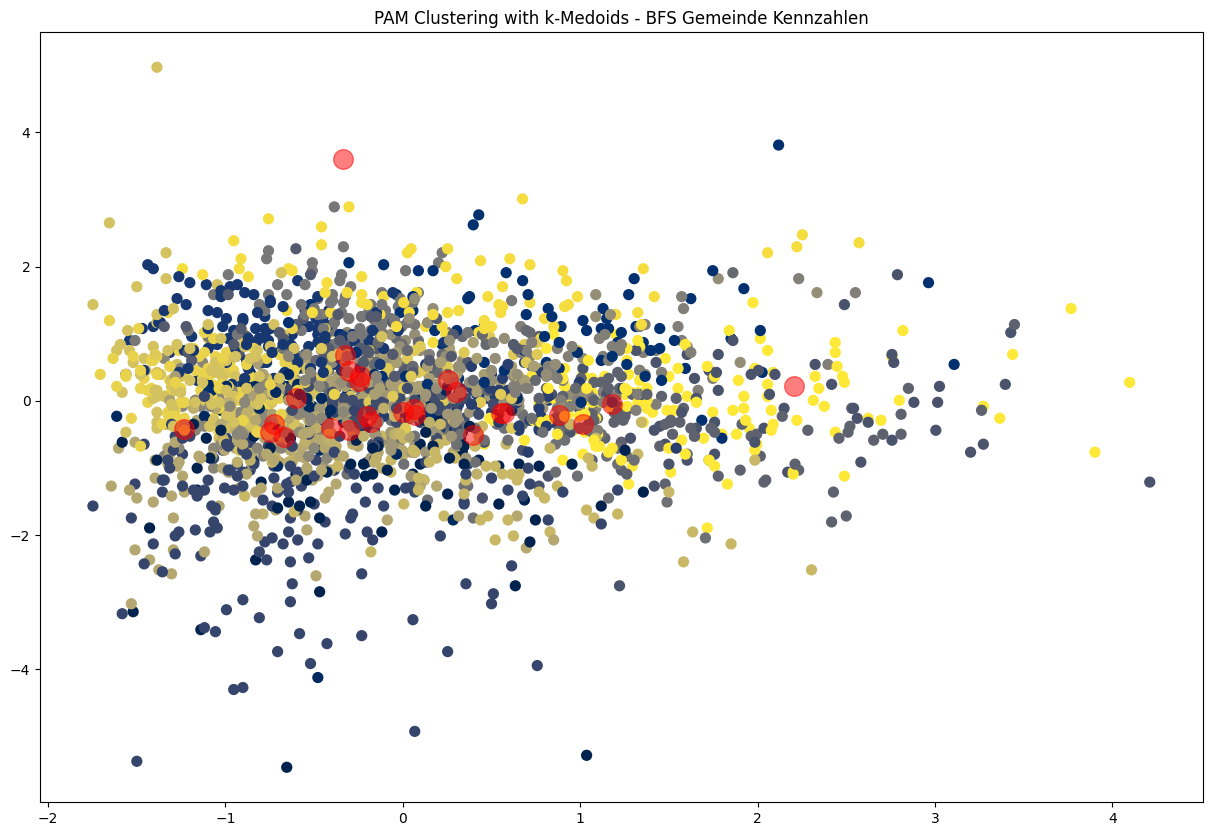

In [23]:
plt.figure(figsize=(15,10))

# Scatterplot of 2 selected features
plt.scatter(df2_trans.iloc[:,2],df2_trans.iloc[:,3],c=clusters,s=50,cmap="cividis")

# Adding Centroids to the Scatterplot
centers = pam_fit.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s = 200,alpha=0.5)

plt.title("PAM Clustering with k-Medoids - BFS Gemeinde Kennzahlen")


In [24]:
# Adding Cluster labels info to the dataframe
df2_trans["Cluster"] = clusters+1

In [25]:
df2_trans.head()

,Einwohner-Veränderung-2010-2019,Bevölkerungsdichte-2019,Anteil-Ausländer-2019,Anteil-Einwohner-0bis19Jahre-2019,Anteil-Einwohner-20bis64Jahre-2019,Anteil-Einwohner-65JahreUndmehr-2019,Cluster
GemeindeNr,,,,,,,
1,-0.053784,-0.236824,-0.283276,-0.199467,0.639688,-0.311484,7
2,0.149041,0.913813,1.211588,-0.080640,0.483294,-0.266162,10
3,-0.106695,0.394008,-0.035850,0.929386,-0.111002,-0.651398,11
4,0.210770,-0.204021,-0.097707,0.513493,-0.111002,-0.311484,11
5,0.140223,0.178263,-0.056469,0.335253,0.452015,-0.606076,7


---  
# F) Load the **Swiss Municipalities** raw GeoData and Pre-Process the corresponding **`geodf` GeoFrame**

In [26]:
# Load GEOPANDAS library
import geopandas as gpd

In [27]:
# read Swiss Cantons Geometry Data (as GeoFrame)
geofilePATH = 'https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/master/zDiversExamples/Notebook-GeoMapping/DATA/'
geofileNAME = 'ch-municipalities-new.geojson'

# Read GeoJSON geometry data into geopandas GeoDataFrame
raw_geodf = gpd.read_file(geofilePATH+geofileNAME)

raw_geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GemeindeNr    2119 non-null   int64   
 1   GemeindeName  2119 non-null   object  
 2   KantonKürzel  2119 non-null   object  
 3   KantonName    2119 non-null   object  
 4   geometry      2119 non-null   geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 82.9+ KB


## Define explicitely a **subset of cantons** (ch_selection) by using the KantonKürzelvalues

In [35]:
# Define your specific cantons list (e.g. central swiss)
ch_subset = ['GR','VS','BE', 'JU','SG']

In [36]:
# Define a new geoFrame containing the municipalities of the defined list of cantons
geodf_filtered = raw_geodf[raw_geodf.KantonKürzel.isin(ch_subset)]

print(geodf_filtered.KantonKürzel.unique())

geodf_filtered.info()
geodf_filtered.head()

['BE' 'SG' 'GR' 'VS' 'JU']
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 680 entries, 159 to 2118
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GemeindeNr    680 non-null    int64   
 1   GemeindeName  680 non-null    object  
 2   KantonKürzel  680 non-null    object  
 3   KantonName    680 non-null    object  
 4   geometry      680 non-null    geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 31.9+ KB


,GemeindeNr,GemeindeName,KantonKürzel,KantonName,geometry
159,301,Aarberg,BE,Bern,"MULTIPOLYGON Z (((7.29022 47.06139 442.80250, ..."
160,302,Bargen,BE,Bern,"MULTIPOLYGON Z (((7.25063 47.05127 445.20250, ..."
161,303,Grossaffoltern,BE,Bern,"MULTIPOLYGON Z (((7.38786 47.07443 529.62250, ..."
162,304,Kallnach,BE,Bern,"MULTIPOLYGON Z (((7.21244 47.02912 440.30125, ..."
163,305,Kappelen,BE,Bern,"MULTIPOLYGON Z (((7.25063 47.05127 445.20250, ..."


---  
## **Combine GeoFrame** and **DataFrame** for Visual Data Analysis and Geomapping

In [37]:
# Merge GeoFrame with DataFrame on corresponding "GemeindeNr" values (see "inner join" operation)
joined_geodf = pd.merge(geodf_filtered, df2_trans, on=["GemeindeNr"])

joined_geodf.info()
joined_geodf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   GemeindeNr                            680 non-null    int64   
 1   GemeindeName                          680 non-null    object  
 2   KantonKürzel                          680 non-null    object  
 3   KantonName                            680 non-null    object  
 4   geometry                              680 non-null    geometry
 5   Einwohner-Veränderung-2010-2019       680 non-null    float64 
 6   Bevölkerungsdichte-2019               680 non-null    float64 
 7   Anteil-Ausländer-2019                 680 non-null    float64 
 8   Anteil-Einwohner-0bis19Jahre-2019     680 non-null    float64 
 9   Anteil-Einwohner-20bis64Jahre-2019    680 non-null    float64 
 10  Anteil-Einwohner-65JahreUndmehr-2019  680 non-null    float64 
 11

,GemeindeNr,GemeindeName,KantonKürzel,KantonName,geometry,Einwohner-Veränderung-2010-2019,Bevölkerungsdichte-2019,Anteil-Ausländer-2019,Anteil-Einwohner-0bis19Jahre-2019,Anteil-Einwohner-20bis64Jahre-2019,Anteil-Einwohner-65JahreUndmehr-2019,Cluster
0,301,Aarberg,BE,Bern,"MULTIPOLYGON Z (((7.29022 47.06139 442.80250, ...",0.360684,0.184572,-0.417298,-0.258880,-0.361232,0.436328,15
1,302,Bargen,BE,Bern,"MULTIPOLYGON Z (((7.25063 47.05127 445.20250, ...",-0.406523,-0.388223,-0.788437,0.186720,-0.142281,-0.039552,24
2,303,Grossaffoltern,BE,Bern,"MULTIPOLYGON Z (((7.38786 47.07443 529.62250, ...",-0.018510,-0.298645,-1.128647,-0.288587,0.076670,0.164396,20
3,304,Kallnach,BE,Bern,"MULTIPOLYGON Z (((7.21244 47.02912 440.30125, ...",-0.468252,-0.397055,-0.705962,-0.704480,-0.017166,0.572294,19
4,305,Kappelen,BE,Bern,"MULTIPOLYGON Z (((7.25063 47.05127 445.20250, ...",0.290137,-0.389485,-1.159576,0.305546,0.577130,-0.651398,4


---  
# G) **Create Choropleth Geomaps** for Visual Data Analysis

In [31]:
# Load PLOTLY library
import plotly.express as px

In [38]:
geodf = joined_geodf

In [33]:
geodf.info()
geodf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   GemeindeNr                            919 non-null    int64   
 1   GemeindeName                          919 non-null    object  
 2   KantonKürzel                          919 non-null    object  
 3   KantonName                            919 non-null    object  
 4   geometry                              919 non-null    geometry
 5   Einwohner-Veränderung-2010-2019       919 non-null    float64 
 6   Bevölkerungsdichte-2019               919 non-null    float64 
 7   Anteil-Ausländer-2019                 919 non-null    float64 
 8   Anteil-Einwohner-0bis19Jahre-2019     919 non-null    float64 
 9   Anteil-Einwohner-20bis64Jahre-2019    919 non-null    float64 
 10  Anteil-Einwohner-65JahreUndmehr-2019  919 non-null    float64 
 11

,GemeindeNr,GemeindeName,KantonKürzel,KantonName,geometry,Einwohner-Veränderung-2010-2019,Bevölkerungsdichte-2019,Anteil-Ausländer-2019,Anteil-Einwohner-0bis19Jahre-2019,Anteil-Einwohner-20bis64Jahre-2019,Anteil-Einwohner-65JahreUndmehr-2019,Cluster
0,1,Aeugst am Albis,ZH,Zürich,"MULTIPOLYGON Z (((8.50388 47.27308 720.72250, ...",-0.053784,-0.236824,-0.283276,-0.199467,0.639688,-0.311484,7
1,2,Affoltern am Albis,ZH,Zürich,"MULTIPOLYGON Z (((8.41466 47.29360 463.84375, ...",0.149041,0.913813,1.211588,-0.080640,0.483294,-0.266162,10
2,3,Bonstetten,ZH,Zürich,"MULTIPOLYGON Z (((8.44132 47.31583 579.46875, ...",-0.106695,0.394008,-0.035850,0.929386,-0.111002,-0.651398,11
3,4,Hausen am Albis,ZH,Zürich,"MULTIPOLYGON Z (((8.57437 47.21707 545.69750, ...",0.210770,-0.204021,-0.097707,0.513493,-0.111002,-0.311484,11
4,5,Hedingen,ZH,Zürich,"MULTIPOLYGON Z (((8.43621 47.31520 609.31500, ...",0.140223,0.178263,-0.056469,0.335253,0.452015,-0.606076,7


#### Choropleth Map of **Clusters** for BFS Gemeinde Kennzahlen in selected Swiss Cantons

In [39]:
# Create Choropleth GeoMap with BFS Kennzahlen (Feature "Clusters")
fig = px.choropleth_mapbox(
    geodf,
    geojson=geodf.geometry,
    locations=geodf.index,
    color='Cluster',                                               # define feature variable
    color_continuous_scale=px.colors.diverging.Spectral,           # define color palette
    labels={'Clusters':'CH Gemeinden clustered nach BFS Kennzahlen'},

    hover_name='Cluster',                                         # define mouse over infos
    hover_data={'GemeindeNr':True, 'GemeindeName':True,'KantonName':True, 'Einwohner-Veränderung-2010-2019':True, 'Anteil-Ausländer-2019':True, },
    opacity=0.5,
    center=dict(lat=46.94809, lon=7.44744),                      # set capital Bern as map center
    zoom=6.5,
    mapbox_style="carto-positron"                                # other option "open-street-map"
)

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
# set colorbar position for X-axis
fig.update_layout(coloraxis_colorbar_x=0.0)

fig.show()